In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def svd_(A):
    m, n = A.shape
    AAT = np.dot(A, A.T)
    ATA = np.dot(A.T, A)
    eigvals_U, U = np.linalg.eigh(AAT)
    idx_U = np.argsort(eigvals_U)[::-1]
    eigvals_U = eigvals_U[idx_U]
    U = U[:, idx_U]
    eigvals_V, V = np.linalg.eigh(ATA)
    idx_V = np.argsort(eigvals_V)[::-1]
    eigvals_V = eigvals_V[idx_V]
    V = V[:, idx_V]
    singular_vals = np.sqrt(np.maximum(eigvals_U[:min(m, n)], 0))
    return U, singular_vals, V.T

In [3]:
# Reconstruct image approximation using top k singular values/vectors
def svd_reconstruct(U, S, Vt, k):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    return U_k @ S_k @ Vt_k

# Compression ratio formula
def compression_ratio(m, n, k):
    original = m * n
    compressed = k * (m + n + 1)
    return original / compressed

Rank 1, Compression Ratio: 112.25
Rank 5, Compression Ratio: 22.45
Rank 10, Compression Ratio: 11.23
Rank 20, Compression Ratio: 5.61
Rank 40, Compression Ratio: 2.81
Rank 50, Compression Ratio: 2.25
Rank 1000000, Compression Ratio: 0.00


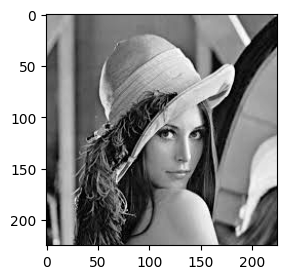

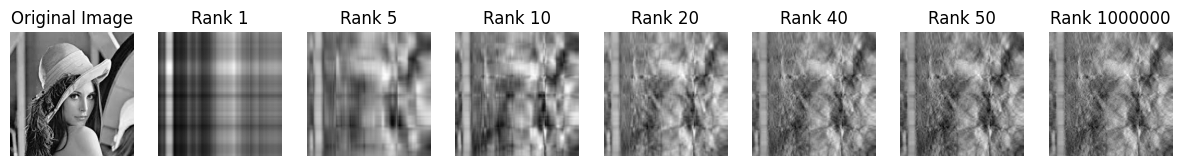

In [4]:
im_path="lady.jpg"
im=cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(im,cmap="grey")
img_gray=im/255.0
U, S, Vt = svd_(img_gray)
ranks = [1, 5, 10, 20, 40, 50,1000000]

plt.figure(figsize=(15, 5))
plt.subplot(1, len(ranks) + 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(ranks):
    img_approx = svd_reconstruct(U, S, Vt, k)
    plt.subplot(1, len(ranks) + 1, i + 2)
    plt.imshow(img_approx, cmap='gray')
    plt.title(f'Rank {k}')
    plt.axis('off')
    cr = compression_ratio(*img_gray.shape, k)
    print(f'Rank {k}, Compression Ratio: {cr:.2f}')

plt.show()

### Inference
Eigen decomposition on large matrices (like images) is numerically unstable.

Small floating-point errors in eigenvalues/eigenvectors propagate when reconstructing.

That’s why reconstruction quality is worse than using np.linalg.svd (which uses stable LAPACK algorithms).

U, Σ, Vᵀ are not perfectly consistent, leading to blurry reconstruction.

Smooth Image: Needs very few singular values. Even with n=5–10, reconstruction looks good.

Edge-Dominant Image: Requires moderate values. At n=20–40, edges become sharp and clear.

Textured Image: Needs many singular values. Only at n=40–50 does the texture start to look realistic.

Rank 1, Compression Ratio: 255.75
Rank 5, Compression Ratio: 51.15
Rank 10, Compression Ratio: 25.58
Rank 20, Compression Ratio: 12.79
Rank 40, Compression Ratio: 6.39
Rank 50, Compression Ratio: 5.12
Rank 100, Compression Ratio: 2.56
Rank 1000000, Compression Ratio: 0.00


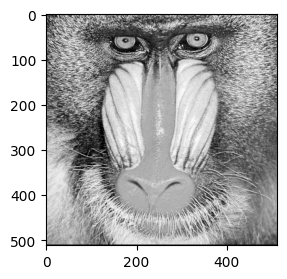

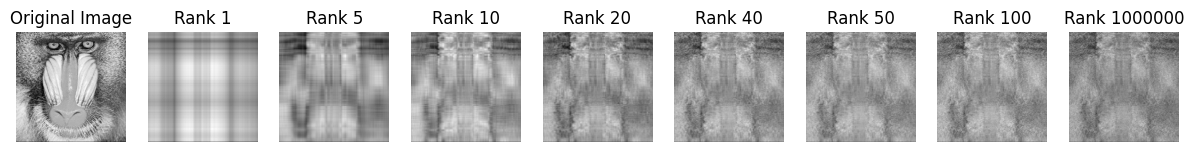

In [5]:
im_path="baboon.ppm"
im=cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(im,cmap="grey")
img_gray=im/255.0
U, S, Vt = svd_(img_gray)
ranks = [1, 5, 10, 20, 40, 50,100,1000000]

plt.figure(figsize=(15, 5))
plt.subplot(1, len(ranks) + 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(ranks):
    img_approx = svd_reconstruct(U, S, Vt, k)
    plt.subplot(1, len(ranks) + 1, i + 2)
    plt.imshow(img_approx, cmap='gray')
    plt.title(f'Rank {k}')
    plt.axis('off')
    cr = compression_ratio(*img_gray.shape, k)
    print(f'Rank {k}, Compression Ratio: {cr:.2f}')

plt.show()

Rank 1, Compression Ratio: 169.13
Rank 5, Compression Ratio: 33.83
Rank 10, Compression Ratio: 16.91
Rank 20, Compression Ratio: 8.46
Rank 40, Compression Ratio: 4.23
Rank 50, Compression Ratio: 3.38
Rank 100, Compression Ratio: 1.69


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 330 is different from 348)

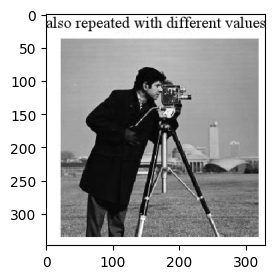

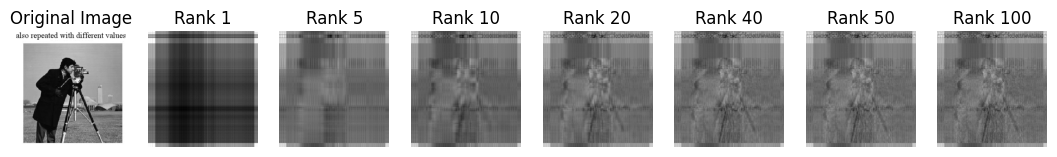

In [6]:
im_path="camera.png"
im=cv2.imread(im_path,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(im,cmap="grey")
img_gray=im/255.0
U, S, Vt = svd_(img_gray)
ranks = [1, 5, 10, 20, 40, 50,100,1000000]

plt.figure(figsize=(15, 5))
plt.subplot(1, len(ranks) + 1, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(ranks):
    img_approx = svd_reconstruct(U, S, Vt, k)
    plt.subplot(1, len(ranks) + 1, i + 2)
    plt.imshow(img_approx, cmap='gray')
    plt.title(f'Rank {k}')
    plt.axis('off')
    cr = compression_ratio(*img_gray.shape, k)
    print(f'Rank {k}, Compression Ratio: {cr:.2f}')

plt.show()

In [7]:
def pca_(X, k):
    print(f"Performing PCA to find top {k} components...")
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    print("Computing eigen decomposition of covariance matrix")
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_idx]
    eigvecs = eigvecs[:, sorted_idx]
    eigvecs = eigvecs[:, :k]
    eigvals = eigvals[:k]
    print(f"Top {k} eigenvalues:", eigvals[:5], "..." if k >5 else "")
    return mean, eigvecs, eigvals


fetching...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\dubey\scikit_learn_data
completed fetching...
applying svd..
applying pca...
Performing PCA to find top 100 components...
Computing eigen decomposition of covariance matrix
Top 100 eigenvalues: [19.01344294 11.18806515  6.62678317  3.96479536  2.90861252] ...


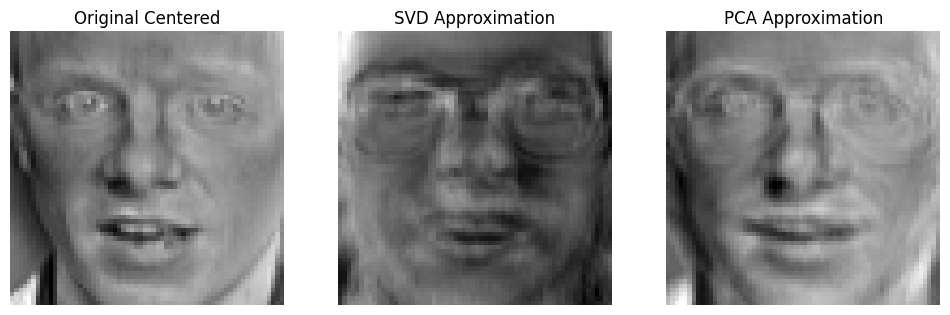

In [8]:
# from sklearn.datasets import fetch_openml
# import numpy as np

# print("fetching...")
# fashion = fetch_openml('Fashion-MNIST', version=1, as_frame=False)

# X = fashion.data / 255.0
# n, d = X.shape
# m = int(np.sqrt(d))
# k = 100

# Xm = np.mean(X, axis=0)
# Xc = X - Xm
# Xc_small = Xc[:300]
# print("completed fetching...")
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

print("fetching...")
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data  # already scaled between 0 and 1

n, d = X.shape
m = int(np.sqrt(d))
k = 100

Xm = np.mean(X, axis=0)
Xc = X - Xm
Xc_small = Xc[:300]
print("completed fetching...")


print("applying svd..")
U, S, VT = svd_(Xc_small)
Uk = U[:, :k]
Sk = S[:k]
VTk = VT[:k, :]
X_svd = Uk @ np.diag(Sk) @ VTk


print("applying pca...")
mean, eigvecs, eigvals = pca_(Xc_small, k)
X_centered = Xc_small - mean
Xpca = X_centered @ eigvecs      
X_pca = Xpca @ eigvecs.T + mean  
idx = 0

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(Xc_small[idx].reshape(m, m), cmap='gray')
plt.title('Original Centered')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(X_svd[idx].reshape(m, m), cmap='gray')
plt.title('SVD Approximation')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(X_pca[idx].reshape(m, m), cmap='gray')
plt.title('PCA Approximation')
plt.axis('off')

plt.show()

Original Centered → Clearer, with natural facial details (skin gradients, smooth areas).

SVD Approximation → Slightly blurred, smoother surfaces, but major facial structure (eyes, mouth, glasses) is preserved.

PCA Approximation → Similar structure, but finer textures are lost, and edges look a little “washed out.”


SVD captures overall structure very well, emphasizing global patterns (broad intensity variations) → results in smoother reconstructions.

PCA captures variance directions → tends to highlight dominant features (edges, glasses, mouth), but struggles with subtle textures.

Both approximations are close, but SVD looks smoother, while PCA retains more edge-like structures.
